# Numpy 테크닉 2

# 1. 배열 합치기

In [1]:
import numpy as np
import numpy.random as npr

In [2]:
array_1 = [[1,2],[3,4]]
array_2 = [[5,6],[7,8]]

## concatenate 행과 열로 합치기

In [6]:
np.concatenate((array_1, array_2))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [7]:
np.concatenate((array_1,array_2), axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [8]:
x = npr.randint(20,size=20).reshape(10,2)
y = np.arange(10)

In [10]:
# 배열의 크기가 다르면 합쳐지지 않는다
np.concatenate((x,y))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

## append 함수도 마찬가지

In [11]:
z = np.append(x,y)

the resulting array is "flattened"

## reshape()로 차원의 크기 변경

In [12]:
z = z.reshape(10,3)
print(z)
print(z.shape)

[[18  6  2]
 [11 16  9]
 [16  6  7]
 [ 5  2 10]
 [19 10 18]
 [17 19  2]
 [11  9  0]
 [ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]]
(10, 3)


# 2. 1차원 배열 만들기 (Flattening Arrays)

In [17]:
arr = np.arange(27).reshape(3,3,3)
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [18]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

## .flat = value 값 바꾸기

In [19]:
arr_copy = arr.copy()
arr_copy.flat = 3
arr_copy

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]])

## 인덱스 지정으로 값 바꾸기

In [20]:
arr_copy.flat[[1,4,7,10]] = 1
arr_copy

array([[[3, 1, 3],
        [3, 1, 3],
        [3, 1, 3]],

       [[3, 1, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]])

In [21]:
arr_copy.flat[1:9] = 0
arr_copy

array([[[3, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 1, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]])

In [23]:
# reshape로 2차원 배열로
arr.reshape(-1,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

# 3. Boolean 조건 배열

In [24]:
import numpy.random as npr
import matplotlib.pyplot as plt

## dtype 파라미터로 Bool 만들기

In [27]:
print(np.full(4, True, dtype=bool))
print(np.ones(4, dtype=bool))
print(np.zeros(4,dtype=bool))

[ True  True  True  True]
[ True  True  True  True]
[False False False False]


In [28]:
npr.randint(0,2, size=10, dtype=bool)

array([False,  True, False,  True,  True,  True,  True, False, False,
        True])

In [29]:
data = npr.normal(100, 15, 25)
data

array([ 87.1229693 , 107.64532848, 125.61802218, 102.33598191,
        81.25514909, 115.33923556,  90.4932745 , 102.65620161,
        95.84699336,  75.96215872, 111.87894985, 112.72934966,
       106.98054361, 100.46698012, 118.0894695 , 107.63372439,
       101.61139557, 107.00020804, 126.27731049,  99.09513248,
       125.57040882, 110.91945171, 100.6959004 ,  98.08977427,
       105.74080898])

(array([1., 1., 2., 1., 4., 4., 5., 3., 1., 3.]),
 array([ 75.96215872,  80.9936739 ,  86.02518908,  91.05670425,
         96.08821943, 101.11973461, 106.15124979, 111.18276496,
        116.21428014, 121.24579532, 126.27731049]),
 <a list of 10 Patch objects>)

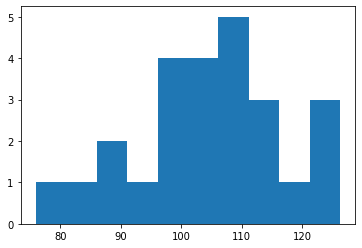

In [30]:
plt.hist(data)

In [31]:
mask = data > 100
mask

array([False,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True])

In [32]:
data[mask]

array([107.64532848, 125.61802218, 102.33598191, 115.33923556,
       102.65620161, 111.87894985, 112.72934966, 106.98054361,
       100.46698012, 118.0894695 , 107.63372439, 101.61139557,
       107.00020804, 126.27731049, 125.57040882, 110.91945171,
       100.6959004 , 105.74080898])

## 조건을 위한 logical 함수  (all, any, allclose)
https://docs.scipy.org/doc/numpy/reference/routines.logic.html

In [33]:
mask = np.logical_and(data > 100, data <110)
data[mask]

array([107.64532848, 102.33598191, 102.65620161, 106.98054361,
       100.46698012, 107.63372439, 101.61139557, 107.00020804,
       100.6959004 , 105.74080898])

In [34]:
mask= np.logical_or(data > 115, data <85)
data[mask]

array([125.61802218,  81.25514909, 115.33923556,  75.96215872,
       118.0894695 , 126.27731049, 125.57040882])

In [35]:
rand = npr.randint(1,11, 25)
close = data + rand
close

array([ 97.1229693 , 111.64532848, 134.61802218, 103.33598191,
        83.25514909, 118.33923556,  99.4932745 , 111.65620161,
       105.84699336,  78.96215872, 112.87894985, 117.72934966,
       107.98054361, 109.46698012, 125.0894695 , 113.63372439,
       110.61139557, 112.00020804, 134.27731049, 107.09513248,
       133.57040882, 113.91945171, 101.6959004 , 102.08977427,
       114.74080898])

In [36]:
np.allclose(data, close, atol=10)

True

In [37]:
np.isclose(data, close, atol=5)

array([False,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False,  True,  True,  True, False])

# 4. 통계 및 수학 함수

In [38]:
data = tuple(range(10))
np.multiply(data, data)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [39]:
data = np.arange(10)
np.multiply(data, data, where= data > 3)

array([ 0,  1,  2,  3, 16, 25, 36, 49, 64, 81])

In [40]:
data = np.arange(20).reshape(2,10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [41]:
np.sum(data, axis=1)

array([ 45, 145])

In [42]:
np.sum(data, axis=0)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [43]:
months = np.arange(1,37)
conv =np.mod(months, 12 )
conv

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11,  0])

In [44]:
mask = conv == 0
conv[mask] = 12
conv

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12])

## 합치기

In [45]:
np.multiply.reduce(np.arange(1,6))

120

In [46]:
data = np.log(1+npr.normal(0,.015, size=21))
data

array([-0.01131347, -0.02513019,  0.00342614,  0.00394442, -0.01924954,
       -0.00649563,  0.03034658, -0.01847894, -0.01629323,  0.00312835,
        0.00704043,  0.0092328 ,  0.01727571,  0.00598084,  0.00701163,
        0.00212981,  0.00227627,  0.00269827, -0.02468597, -0.00513592,
        0.00653288])

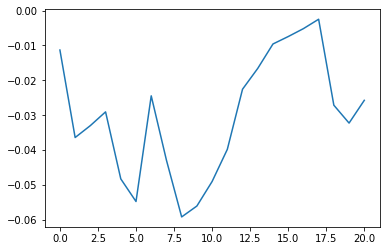

In [47]:
plt.plot(np.add.accumulate(data))
plt.show()

In [48]:
data.cumsum()

array([-0.01131347, -0.03644366, -0.03301751, -0.0290731 , -0.04832263,
       -0.05481827, -0.02447169, -0.04295063, -0.05924386, -0.05611551,
       -0.04907508, -0.03984229, -0.02256658, -0.01658574, -0.00957411,
       -0.0074443 , -0.00516804, -0.00246977, -0.02715573, -0.03229166,
       -0.02575877])

# 5. np.where

In [49]:
data = npr.normal(0, 0.015, size = 252)

(array([ 2.,  2.,  6.,  9., 18., 21., 24., 35., 27., 31., 28., 20., 14.,
         6.,  9.]),
 array([-0.04158374, -0.03667391, -0.03176409, -0.02685426, -0.02194443,
        -0.01703461, -0.01212478, -0.00721496, -0.00230513,  0.0026047 ,
         0.00751452,  0.01242435,  0.01733417,  0.022244  ,  0.02715383,
         0.03206365]),
 <a list of 15 Patch objects>)

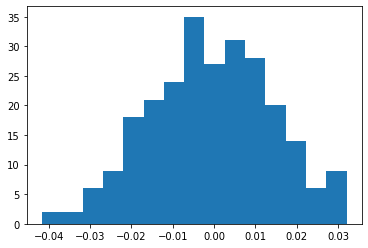

In [50]:
plt.hist(data, bins=15)

In [59]:
positive = np.where(data > 0, True, False)
positive

array([False, False, False,  True, False,  True,  True, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False,

In [62]:
# 0 보다 큰 값 갯수 평균 구하기
print(len(data[positive]))
print("{:.2%}".format(data[positive].mean()))

126
1.14%


In [61]:
# '~' 표시로 반대 조건 평균값
print(len(data[~positive]))
print("{:.2%}".format(data[~positive].mean()))

126
-1.29%


## 특정 값 대체하여 채워 넣기

In [54]:
x = npr.standard_normal(20)
y = np.arange(20)

In [56]:
x

array([-0.31741018,  0.20199394, -1.45484891,  0.98724981, -0.21330865,
        0.59434787,  1.40630275, -0.652404  , -0.13711214, -0.48512042,
        0.23553136,  0.4686255 , -0.01434865, -0.43141664,  0.76212637,
        1.14888569, -0.28427045, -1.05705464, -2.23602822,  1.80996296])

In [57]:
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [55]:
np.where(x < 0, y , x)

array([ 0.        ,  0.20199394,  2.        ,  0.98724981,  4.        ,
        0.59434787,  1.40630275,  7.        ,  8.        ,  9.        ,
        0.23553136,  0.4686255 , 12.        , 13.        ,  0.76212637,
        1.14888569, 16.        , 17.        , 18.        ,  1.80996296])